In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv(r"data.xlsx - Sheet1.csv")

In [5]:
df.shape

(9568, 5)

In [6]:
df.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [7]:
df.describe()

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


In [8]:
df.isnull().sum()

AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64

In [9]:
print(df.columns)

Index(['AT', 'V', 'AP', 'RH', 'PE'], dtype='object')


In [10]:
# spiliiting the data
# taking 80 % for training and 10% for validation and 10% for the test

In [11]:
data=df.values
data.shape

(9568, 5)

In [12]:
split1=int(0.8*data.shape[0])

#x=data[:split,:4]
split2=data.shape[0]-split1
print(split1,split2)
print((split1+split2)==data.shape[0])
x=data[:,0:4]
y=data[:,4]
print(x.shape)

7654 1914
True
(9568, 4)


In [13]:
x_train=x[:split1,:4]
x_test=x[split1:,:4]
x_train.shape
print(x_test.shape)

(1914, 4)


In [14]:
#x[:5,:]

In [15]:
#y=data[split1:,4]

In [16]:
y_train=y[:split1]

In [17]:
y_train.shape

(7654,)

In [18]:
y_test=y[split1:]
print(y_test.shape)

(1914,)


In [19]:
y_test=y_test.reshape((y_test.shape[0],1))

In [20]:
y_train=y_train.reshape((y_train.shape[0],1))

In [21]:
print(y_test.shape,y_train.shape)

(1914, 1) (7654, 1)


In [22]:
# implementing the neural network here

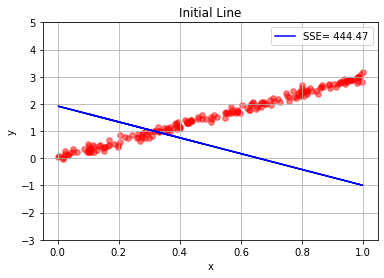

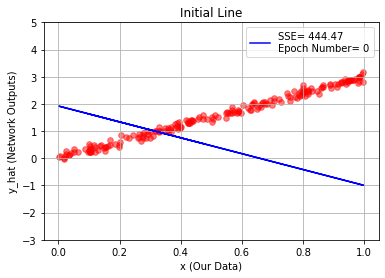

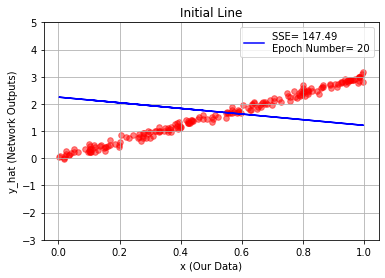

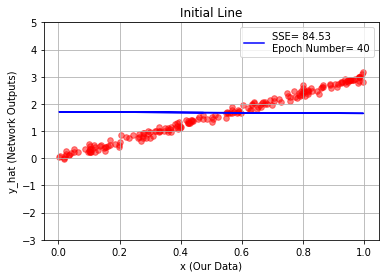

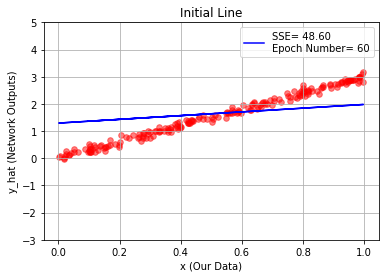

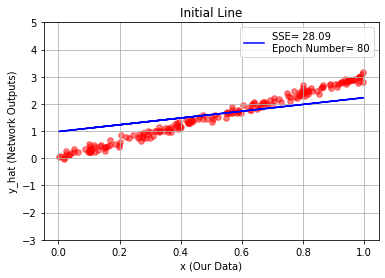

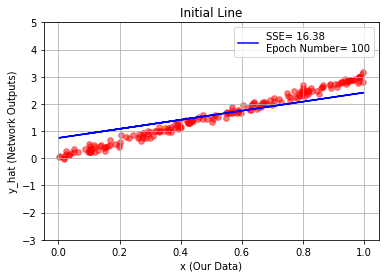

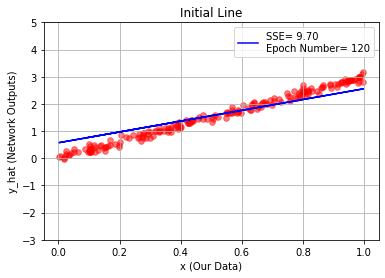

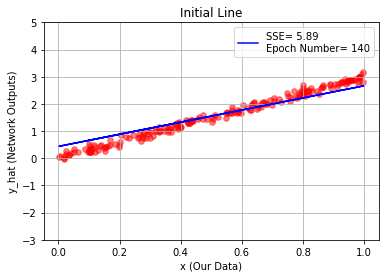

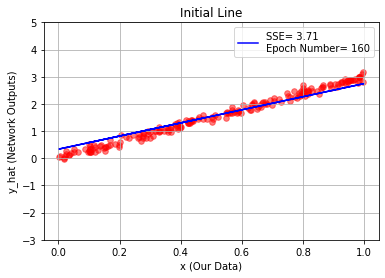

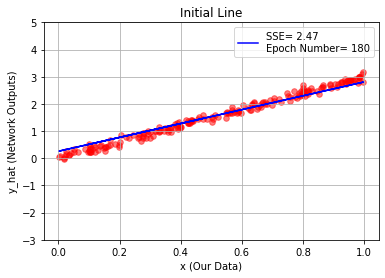

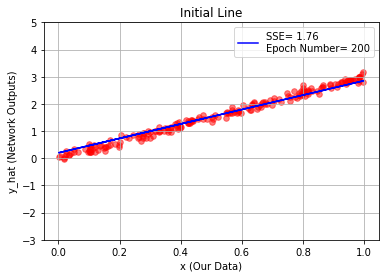

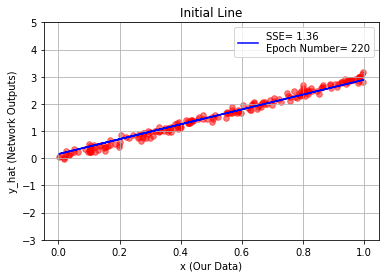

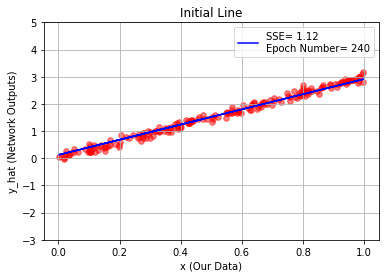

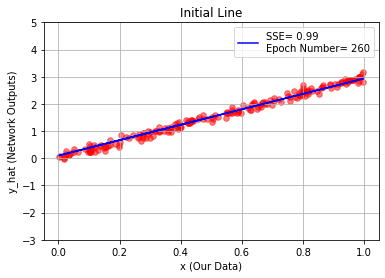

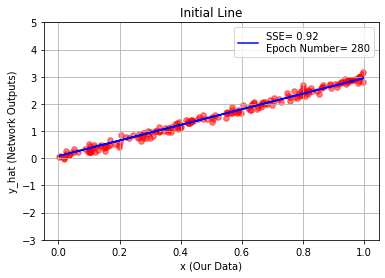

In [136]:
def SSE(y, y_hat):
    return 0.50*np.sum((y- y_hat)**2)
# The linear function
def Linear(Z):
    return Z

def dEdW_1 (y, y_hat,x_1):
    return np.sum(-(y - y_hat) * x_1)
 
def dEdW_0 (y, y_hat):
    return np.sum(-(y - y_hat))

# The number of training data
N = 200
# 200 random samples as our data
x_1 = np.random.rand(N)
# Define the line slope and the Gaussian noise parameters
slope = 3
mu, sigma = 0, 0.1 # mean and standard deviation
intercept = np.random.normal(mu, sigma, N)
# Define the coordinates of the data points using the line equation and the added Gaussian noise 
y = slope*x_1 + intercept
w_1 = np.random.uniform(-2,-3,1)
w_0 = np.random.uniform(0,2,1)
x_0 = 1
# The line
y_hat = w_1*x_1 + w_0*x_0
plt.scatter(x_1, y, s=area, c='r', alpha=0.5)
# We can also show the error
plt.plot(x_1, y_hat, '-b', label = "SSE= %.2f" %SSE(y, y_hat))
plt.grid()
plt.title('Initial Line')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.ylim(-3,5)
plt.show()

epoch = 300
# Learning rate
eta = 0.001
# This list will save the error as training keeps going
E = []
for ep in range(epoch):
    ##################################################### Forward pass starts #################################
    Z = w_1 * x_1 + w_0*x_0
    y_hat = Linear(Z)
    error = SSE(y, y_hat)
    E.append(error) # We save the error per epoch
    ##################################################### Back propagation starts #############################
    # Here we call our functions for computing the derivatives
    dEdw_1 = dEdW_1(y, y_hat, x_1)
    dEdw_0 = dEdW_0(y, y_hat)
    # We update our parameters (i.e., the weights)
    w_1 = w_1 - eta*dEdw_1
    w_0 = w_0 - eta*dEdw_0
    # Simply every 20 epochs plot the line using the updated weights
    if ep % 20 == 0:
        # First plot our data
        plt.scatter(x_1, y, s=area, c='r', alpha=0.5)
        # Now plot the improved line
        plt.plot(x_1, y_hat, '-b', label="SSE= %.2f" %error + '\n' + "Epoch Number= %d" %(ep))
        plt.title('Initial Line')
        plt.xlabel('x (Our Data)')
        plt.ylabel('y_hat (Network Outputs)')
        plt.legend()
        plt.ylim(-3, 5)
        plt.grid()
        plt.show()

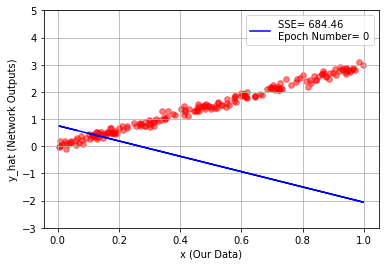

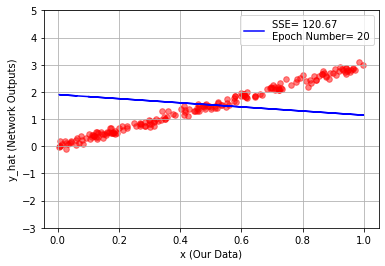

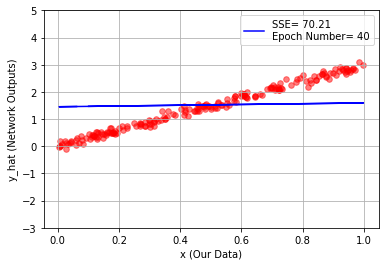

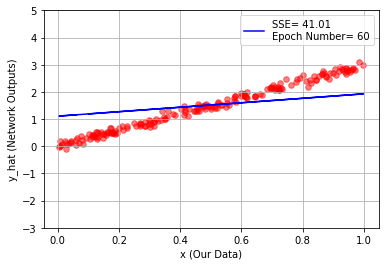

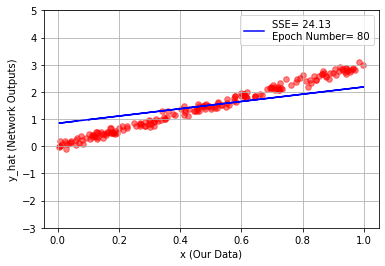

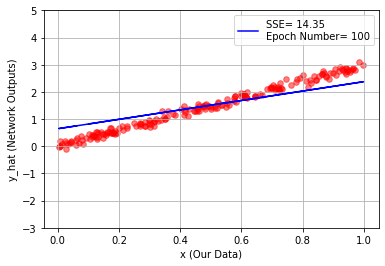

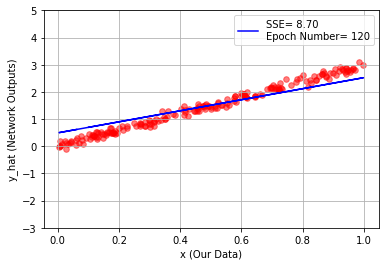

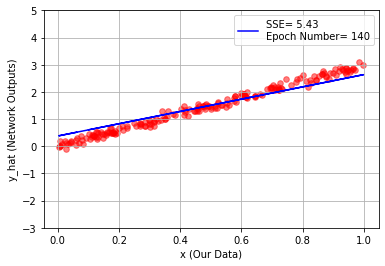

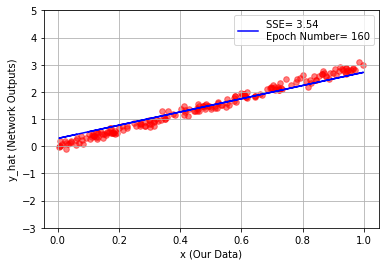

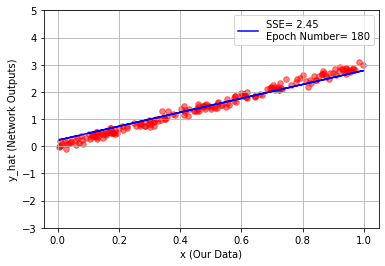

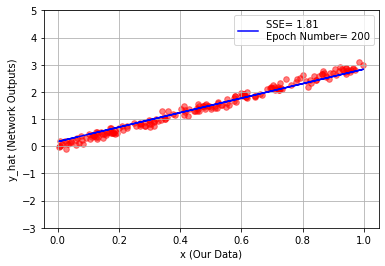

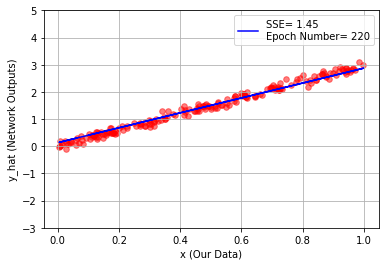

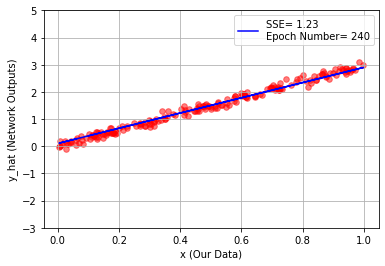

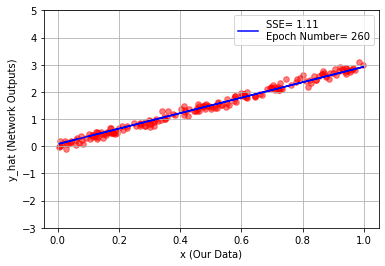

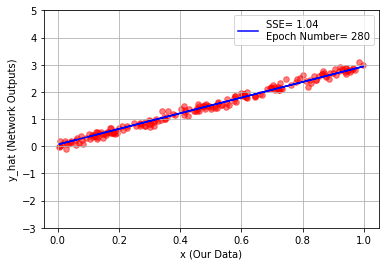

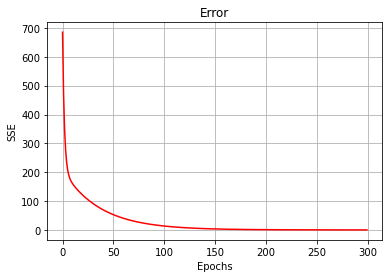

In [137]:
def SSE(y, y_hat):
   return 0.50*np.sum((y - y_hat)**2)
def Linear(Z):
   return Z
def dEdW_1 (y, y_hat,x_1):
   return np.sum(-(y - y_hat) * x_1)
def dEdW_0 (y, y_hat):
   return np.sum(-(y - y_hat))
N = 200
slope = 3
mu, sigma = 0, 0.1 # mean and standard deviation
intercept = np.random.normal(mu, sigma, N)
x_1 = np.random.rand(N)
y = slope*x_1 + intercept
area = np.pi*10
w_1 = np.random.uniform(-2,-3,1)
w_0 = np.random.uniform(0,2,1)
x_0 = 1
y_hat = w_1*x_1 + w_0*x_0
epoch = 300
eta = 0.001
E = []
for ep in range(epoch):
    Z = w_1 * x_1 + w_0*x_0
    y_hat = Linear(Z)
    error = SSE(y, y_hat)
    E.append(error)
    dEdw_1 = dEdW_1(y, y_hat, x_1)
    dEdw_0 = dEdW_0(y, y_hat)
    w_1 = w_1 - eta*dEdw_1
    w_0 = w_0 - eta*dEdw_0
    if ep % 20 == 0:
       plt.scatter(x_1, y, s=area, c='r', alpha=0.5)
       plt.plot(x_1, y_hat, '-b', label="SSE= %.2f" %error + '\n' + "Epoch Number= %d" %(ep))
       plt.xlabel('x (Our Data)')
       plt.ylabel('y_hat (Network Outputs)')
       plt.legend()
       plt.ylim(-3, 5)
       plt.grid()
       plt.show()
plt.plot(E, 'r')
plt.grid()
plt.title("Error")
plt.xlabel("Epochs")
plt.ylabel("SSE")
plt.show()

In [138]:
class neuralnetwork:
    def __init__(self,input_size,layers,output_size):
        np.random.seed(0)
        model={}
        model['w1']=np.random.randn(input_size,layers[0]) # size of weight matrix is going to this check your notes
        # this weight matrix is randomly initialized by this 
        # it is for the first hidden layer
        model['b1']=np.zeros((1,layers[0])) # it will be the bias vector of the first layer
        
        # second layer
        model['w2']=np.random.randn(layers[0],output_size)
        model['b2']=np.zeros((1,output_size))
        
        # third layer
       # model['w3']=np.random.randn(layers[1],output_size)
       # model['b3']=np.zeros((1,output_size))
        
        # this will be the architecture of the neural network
        self.model=model
    def forward(self,x): # this function 
        
        w1,w2=self.model["w1"],self.model["w2"] # these are the unpacked wieghts 
        b1,b2=self.model["b1"],self.model["b2"]# unpacking the 
        
        z1=np.dot(x,w1)+b1
        a1=z1 # same as sigmoid function but produces output in range(-1,1)
        
        z2=np.dot(a1,w2)+b2
        y_=z2
        
        #z3=np.dot(a2,w3)+b3
        #y_=softmax(z3)
        
        self.activation_outputs=(a1,y_) # this will be a tupple returned by this function of activation
        # values calculated at each layer of this network
        return (y_) # final output (mxc) no. of classes x no. of examples
    
    def backward(self,x,y,lr=0.001):
        w1,w2=self.model["w1"],self.model["w2"] # these are the unpacked wieghts 
        b1,b2=self.model["b1"],self.model["b2"]
        
        a1,y_=self.activation_outputs
        # computing error at the final layer (last layer) output layer
        # y_ 
        delta2= y_-y # y is the matrix containing the each of the hot vector where as y_ is the matrix pred
        m=x.shape[0]# m rows and n features
        
        
        dw2=np.dot(a1,delta2)
        db2=np.sum(delta2,axis=0)/float(m)
        
        #delta2=np.dot(delta3,w3.T) # as calculated in the notes 
        #dw2=np.dot(a1.T,delta2)
        #db2=np.sum(delta2,axis=0)/float(m)
        # because we doing back-propagation
        
        delta1=np.dot(delta2,w1.T) # as calculated in the notes 
        dw1=np.dot(x.T,delta1)
        db1=np.sum(delta1,axis=0)/float(m)
        
        # update the model parameters using gradient descent
        self.model["w1"]-= lr*dw1
        self.model["b1"]-=lr*db1
        
        self.model["w2"]-= lr*dw2
        self.model["b2"]-=lr*db2
        
        #self.model["w3"]-= lr*dw3
        #self.model["b3"]-=lr*db3
        
        
    def predict(self,x):
        y_out=self.forward(x)
        return y_out
    
    def summary(self):
        
        w1,w2=self.model["w1"],self.model["w2"] # these are the unpacked wieghts 
        #b1,b2,b3=self.model("b1"),self.model("b2"),self.model("b3")
        a1,y_=self.activation_outputs
         
        print("w1 ",w1.shape)
        print("A1 ",a1.shape)
        
        #print("w2 ",w2.shape)
        #print("A2 ",a1.shape)
        
        print("w2 ",w2.shape)
        print("y_ ",y_.shape)

In [139]:
model=neuralnetwork(x_train.shape[1],[10],y_train.shape[1])

In [140]:
x_train.shape

(7654, 4)

In [141]:
y_=model.forward(x_train)
y.shape

(200,)

In [142]:
x_train.shape

(7654, 4)

In [143]:
x_train1.shape

NameError: name 'x_train1' is not defined

In [ ]:
data.shape

In [ ]:
y_train.shape

In [ ]:
def sigmoid(x):
    return(1/(1 + np.exp(-x)))
   
# Creating the Feed forward neural network
# 1 Input layer(1, 30)
# 1 hidden layer (1, 5)
# 1 output layer(3, 3)
 
def f_forward(x, w1, w2):
    # hidden
    z1 = x.dot(w1)# input from layer 1
    a1 = z1# out put of layer 2
     
    # Output layer
    z2 = a1.dot(w2)# input of out layer
    a2 = z2# output of out layer
    return(a2)
  
# initializing the weights randomly
def generate_wt(x, y):
    l =[]
    for i in range(x * y):
        l.append(np.random.randn())
    return(np.array(l).reshape(x, y))
     
# for loss we will be using mean square error(MSE)
def loss(out, Y):
    s =(np.square(out-Y))
    s = np.sum(s)/len(y)
    return(s)
   
# Back propagation of error
def back_prop(x, y, w1, w2, alpha):
     
    # hidden layer
    z1 = x.dot(w1)# input from layer 1
    a1 = z1# output of layer 2
     
    # Output layer
    z2 = a1.dot(w2)# input of out layer
    a2 = z2# output of out layer
    # error in output layer
    d2 =(a2-y)
    print(d2.shape)
    d1 = (np.dot(w2,d2.T))#np.multiply((w2.dot((d2.transpose()) 
    print(d1.shape)
 
    # Gradient for w1 and w2
    w1_adj = x.transpose().dot(d1.T)
    w2_adj = a1.transpose().dot(d2)
     
    # Updating parameters
    w1 = w1-(alpha*(w1_adj))
    w2 = w2-(alpha*(w2_adj))
     
    return(w1, w2)
 
def train(x, Y, w1, w2, alpha = 0.01, epoch = 10):
    acc =[]
    losss =[]
    for j in range(epoch):
        l =[]
        for i in range(len(x)):
            out = f_forward(x[i], w1, w2)
            #l.append((loss(out, Y[i])))
            w1, w2 = back_prop(x[i].reshape((1,x[i].shape[0])), y[i].reshape((1,1)), w1, w2, alpha)
        #print("epochs:", j + 1, "======== acc:", (1-(sum(l)/len(x)))*100)  
        #acc.append((1-(sum(l)/len(x)))*100)
        #losss.append(sum(l)/len(x))
    return(acc, losss, w1, w2)
  
def predict(x, w1, w2):
    Out = f_forward(x, w1, w2)
    return Out

In [ ]:
w1=generate_wt(4,10)
w2=generate_wt(10,1)

In [133]:
w1,w2=train(x_train,y_train,w1,w2,0.1,100)

(1, 1)
(10, 1)
(1, 1)
(10, 1)
(1, 1)
(10, 1)
(1, 1)
(10, 1)
(1, 1)
(10, 1)
(1, 1)
(10, 1)
(1, 1)
(10, 1)
(1, 1)
(10, 1)
(1, 1)
(10, 1)
(1, 1)
(10, 1)
(1, 1)
(10, 1)
(1, 1)
(10, 1)
(1, 1)
(10, 1)
(1, 1)
(10, 1)
(1, 1)
(10, 1)
(1, 1)
(10, 1)
(1, 1)
(10, 1)
(1, 1)
(10, 1)
(1, 1)
(10, 1)
(1, 1)
(10, 1)
(1, 1)
(10, 1)
(1, 1)
(10, 1)
(1, 1)
(10, 1)
(1, 1)
(10, 1)
(1, 1)
(10, 1)
(1, 1)
(10, 1)
(1, 1)
(10, 1)
(1, 1)
(10, 1)
(1, 1)
(10, 1)
(1, 1)
(10, 1)
(1, 1)
(10, 1)
(1, 1)
(10, 1)
(1, 1)
(10, 1)
(1, 1)
(10, 1)
(1, 1)
(10, 1)
(1, 1)
(10, 1)
(1, 1)
(10, 1)
(1, 1)
(10, 1)
(1, 1)
(10, 1)
(1, 1)
(10, 1)
(1, 1)
(10, 1)
(1, 1)
(10, 1)
(1, 1)
(10, 1)
(1, 1)
(10, 1)
(1, 1)
(10, 1)
(1, 1)
(10, 1)
(1, 1)
(10, 1)
(1, 1)
(10, 1)
(1, 1)
(10, 1)
(1, 1)
(10, 1)
(1, 1)
(10, 1)
(1, 1)
(10, 1)
(1, 1)
(10, 1)
(1, 1)
(10, 1)
(1, 1)
(10, 1)
(1, 1)
(10, 1)
(1, 1)
(10, 1)
(1, 1)
(10, 1)
(1, 1)
(10, 1)
(1, 1)
(10, 1)
(1, 1)
(10, 1)
(1, 1)
(10, 1)
(1, 1)
(10, 1)
(1, 1)
(10, 1)
(1, 1)
(10, 1)
(1, 1)
(10, 1)
(1, 1)
(10

IndexError: index 200 is out of bounds for axis 0 with size 200

In [115]:
x_train[0].shape

(4,)

In [126]:
w1.shape

(4, 10)

In [127]:
w2.shape

(10, 1)

In [134]:
y1=predict(x_train,w1,w2)

In [135]:
y1

array([[-4673.32083385],
       [-4661.02752059],
       [-4653.59423819],
       ...,
       [-4593.88564861],
       [-4651.0785669 ],
       [-4626.17229393]])